# Naive RBF Test Cases

In [136]:
from naive_rbf import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random

## Classification

### Linear Simple

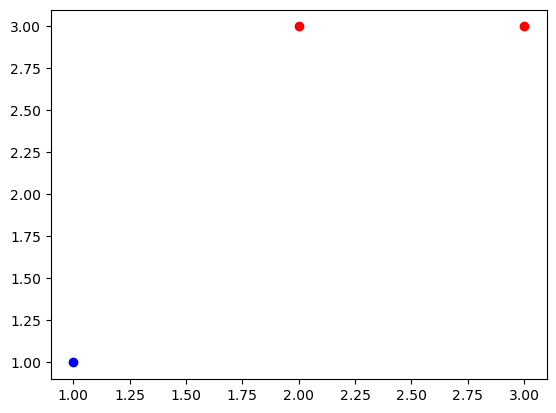

<Figure size 640x480 with 0 Axes>

In [137]:
training_dataset = np.array([
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 3.0]
])
labels = np.array([
    [1.0],
    [-1.0],
    [-1.0]
])

plt.scatter(training_dataset[0, 0], training_dataset[0, 1], color='blue')
plt.scatter(training_dataset[1:3, 0], training_dataset[1:3, 1], color='red')
plt.show()
plt.clf()

In [138]:
input_neurons_count: int = 2
output_neurons_count: int = 1
is_classification: bool = True
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [139]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [140]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [1.], Predicted: [-1.0]
Expected: [-1.], Predicted: [-1.0]
Expected: [-1.], Predicted: [-1.0]


### Linear Multiple

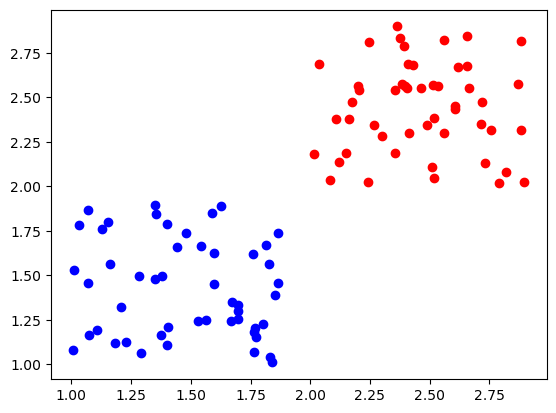

<Figure size 640x480 with 0 Axes>

In [141]:
training_dataset = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
])
labels = np.concatenate(
    [np.ones((50, 1)), np.ones((50, 1)) * -1.0]
)

plt.scatter(training_dataset[0:50, 0], training_dataset[0:50, 1], color='blue')
plt.scatter(training_dataset[50:100, 0], training_dataset[50:100, 1], color='red')
plt.show()
plt.clf()

In [142]:
input_neurons_count: int = 2
output_neurons_count: int = 1
is_classification: bool = True
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [143]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [144]:
indexes: list[int] = [0, 24, 49, 50, 74, 99]

for i in indexes:
    input: list[float] = training_dataset[i]
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [1.], Predicted: [-1.0]
Expected: [1.], Predicted: [-1.0]
Expected: [1.], Predicted: [-1.0]
Expected: [-1.], Predicted: [-1.0]
Expected: [-1.], Predicted: [-1.0]
Expected: [-1.], Predicted: [-1.0]


### XOR

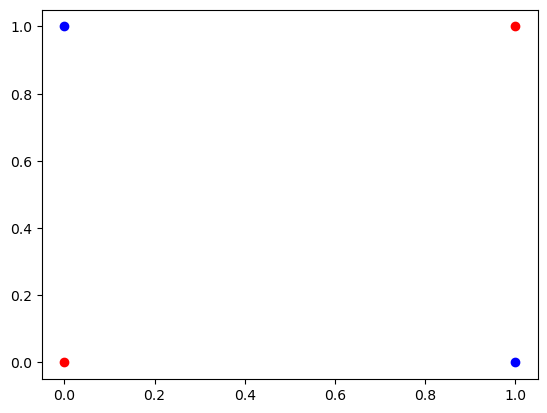

<Figure size 640x480 with 0 Axes>

In [145]:
training_dataset = np.array([[1.0, 0.0], [0.0, 1.0], [0.0, 0.0], [1.0, 1.0]])
labels = np.array([[1.0], [1.0], [-1.0], [-1.0]])

plt.scatter(training_dataset[0:2, 0], training_dataset[0:2, 1], color='blue')
plt.scatter(training_dataset[2:4, 0], training_dataset[2:4, 1], color='red')
plt.show()
plt.clf()

In [146]:
input_neurons_count: int = 2
output_neurons_count: int = 1
is_classification: bool = True
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [147]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [148]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [1.], Predicted: [1.0]
Expected: [1.], Predicted: [1.0]
Expected: [-1.], Predicted: [1.0]
Expected: [-1.], Predicted: [1.0]


### Cross

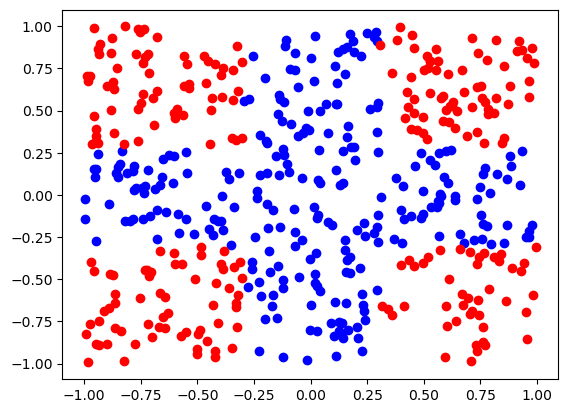

<Figure size 640x480 with 0 Axes>

In [149]:
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0] if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else [-1.0]
    for p in training_dataset
])

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == 1.0, enumerate(training_dataset))
    )))[:, 0], 
    np.array(list(map(
        lambda elt: elt[1], 
        filter(lambda c: labels[c[0]] == 1.0, enumerate(training_dataset))
    )))[:, 1],
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == -1.0, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == -1.0, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.show()
plt.clf()

In [150]:
input_neurons_count: int = 2
output_neurons_count: int = 1
is_classification: bool = True
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [151]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [152]:
inputs = [
    training_dataset[random.randint(0, len(training_dataset) - 1)]
    for _ in range(4)
]
expected = np.array([
    [1] if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else [-1]
    for p in inputs 
])

for i in range(4):
    output: list[float] = naive_rbf.predict(inputs[i])
    print(f"Expected: {expected[i]}, Predicted: {output}")

Expected: [1], Predicted: [1.0]
Expected: [1], Predicted: [1.0]
Expected: [-1], Predicted: [1.0]
Expected: [1], Predicted: [-1.0]


### Multi Linear 3 Classes

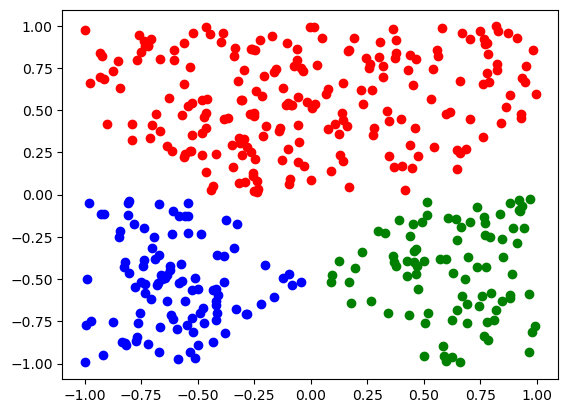

<Figure size 640x480 with 0 Axes>

In [153]:
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0, 0.0, 0.0] if -p[0] - p[1] - 0.5 > 0 > p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 1.0, 0.0] if -p[0] - p[1] - 0.5 < 0 < p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 0.0, 1.0] if -p[0] - p[1] - 0.5 < 0 < p[0] - p[1] - 0.5 and p[1] < 0
    else [0.0, 0.0, 0.0] for p in training_dataset
])
training_dataset = training_dataset[[not np.all(arr == [0, 0, 0]) for arr in labels]]
labels = labels[[not np.all(arr == [0, 0, 0]) for arr in labels]]

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 1], 
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='green'
)
plt.show()
plt.clf()

In [154]:
input_neurons_count: int = 2
output_neurons_count: int = 3
is_classification: bool = True
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [155]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [156]:
inputs = [
    training_dataset[random.randint(0, len(training_dataset) - 1)]
    for _ in range(8)
]
expected = np.array([
    [1.0, 0.0, 0.0] if -p[0] - p[1] - 0.5 > 0 > p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 1.0, 0.0] if -p[0] - p[1] - 0.5 < 0 < p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 0.0, 1.0] if -p[0] - p[1] - 0.5 < 0 < p[0] - p[1] - 0.5 and p[1] < 0
    else [0.0, 0.0, 0.0] for p in inputs
])

for i in range(8):
    output: list[float] = naive_rbf.predict(inputs[i])
    print(f"Expected: {expected[i]}, Predicted: {output}")

Expected: [0. 1. 0.], Predicted: [1.0, -1.0, -1.0]
Expected: [1. 0. 0.], Predicted: [1.0, -1.0, -1.0]
Expected: [0. 0. 1.], Predicted: [-1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, -1.0, -1.0]
Expected: [1. 0. 0.], Predicted: [-1.0, 1.0, -1.0]
Expected: [0. 0. 1.], Predicted: [-1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, -1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, -1.0]


### Multi Cross

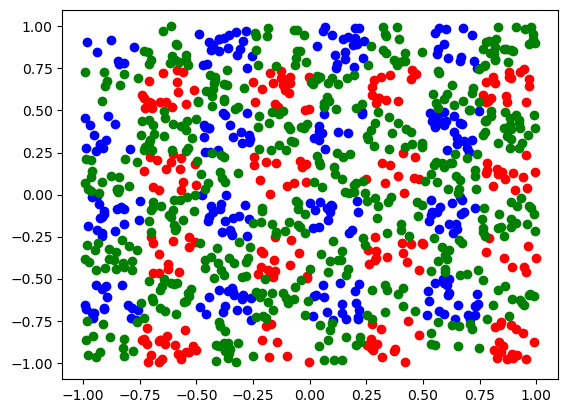

<Figure size 640x480 with 0 Axes>

In [157]:
training_dataset = np.random.random((1000, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0, 0.0, 0.0] if abs(p[0] % 0.5) <= 0.25 < abs(p[1] % 0.5)
    else [0.0, 1.0, 0.0] if abs(p[0] % 0.5) > 0.25 >= abs(p[1] % 0.5)
    else [0.0, 0.0, 1.0]
    for p in training_dataset
])

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='green'
)
plt.show()
plt.clf()

In [158]:
input_neurons_count: int = 2
output_neurons_count: int = 3
is_classification: bool = True
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [159]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [160]:
inputs = [
    training_dataset[random.randint(0, len(training_dataset) - 1)]
    for _ in range(8)
]
expected = np.array([
    [1.0, 0.0, 0.0] if abs(p[0] % 0.5) <= 0.25 < abs(p[1] % 0.5)
    else [0.0, 1.0, 0.0] if abs(p[0] % 0.5) > 0.25 >= abs(p[1] % 0.5)
    else [0.0, 0.0, 1.0]
    for p in training_dataset
])

for i in range(8):
    output: list[float] = naive_rbf.predict(inputs[i])
    print(f"Expected: {expected[i]}, Predicted: {output}")

Expected: [0. 0. 1.], Predicted: [-1.0, -1.0, 1.0]
Expected: [0. 0. 1.], Predicted: [1.0, 1.0, -1.0]
Expected: [0. 0. 1.], Predicted: [1.0, -1.0, -1.0]
Expected: [1. 0. 0.], Predicted: [-1.0, -1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [-1.0, -1.0, 1.0]
Expected: [0. 0. 1.], Predicted: [1.0, 1.0, -1.0]
Expected: [0. 0. 1.], Predicted: [1.0, -1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [-1.0, -1.0, 1.0]


## Regression

### Linear Simple 2D

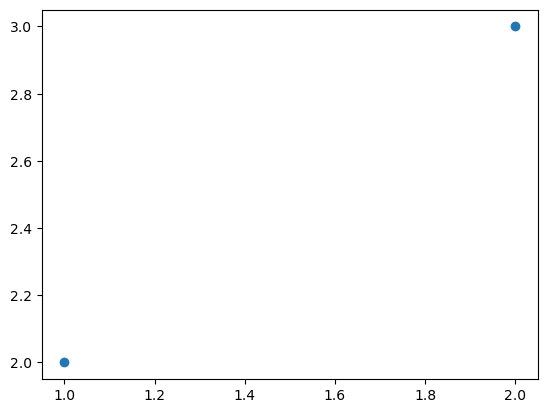

<Figure size 640x480 with 0 Axes>

In [161]:
training_dataset = np.array([[1.0], [2.0]])
labels = np.array([[2.0], [3.0]])

plt.scatter(training_dataset, labels)
plt.show()
plt.clf()

In [162]:
input_neurons_count: int = 1
output_neurons_count: int = 1
is_classification: bool = False 
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [163]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [164]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [-3.94171800369017]
Expected: [3.], Predicted: [-7.88343600738034]


### Non Linear Simple 2

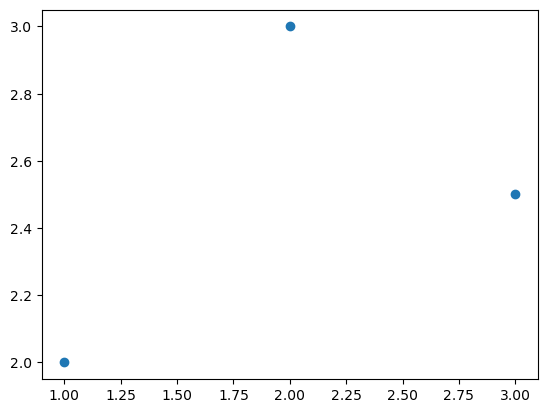

<Figure size 640x480 with 0 Axes>

In [165]:
training_dataset = np.array([[1.0], [2.0], [3.0]])
labels = np.array([[2.0], [3.0], [2.5]])

plt.scatter(training_dataset, labels)
plt.show()
plt.clf()

In [166]:
input_neurons_count: int = 1
output_neurons_count: int = 1
is_classification: bool = False
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [167]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [168]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [-14.895039601770208]
Expected: [3.], Predicted: [-29.790079203540415]
Expected: [2.5], Predicted: [-44.68511880531062]


### Linear Simple 3D

In [169]:
training_dataset = np.array([[1.0, 1.0], [2.0, 2.0], [3.0, 1.0]])
labels = np.array([[2.0], [3.0], [2.5]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [170]:
input_neurons_count: int = 2
output_neurons_count: int = 1
is_classification: bool = False
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [171]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [172]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.6403773707034546]
Expected: [3.], Predicted: [5.280754741406909]
Expected: [2.5], Predicted: [-0.12710820886115037]


### Linear Tricky 3D

In [173]:
training_dataset = np.array([[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]])
Y = np.array([[1.0], [2.0], [3.0]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [174]:
input_neurons_count: int = 2
output_neurons_count: int = 1
is_classification: bool = False
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [175]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [176]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [3.7553284575263977]
Expected: [3.], Predicted: [7.510656915052795]
Expected: [2.5], Predicted: [11.265985372579193]


### Non Linear Simple 3D

In [177]:
training_dataset = np.array([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [0.0, 0.0]])
labels = np.array([[2.0], [1.0], [-2.0], [-1.0]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [178]:
input_neurons_count: int = 2
output_neurons_count: int = 1
is_classification: bool = False
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    is_classification,
    training_dataset,
    labels
)

In [179]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [180]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [168.39588817543358]
Expected: [1.], Predicted: [162.87923260930668]
Expected: [-2.], Predicted: [331.27512078474024]
Expected: [-1.], Predicted: [0.0]
